### Indian Cuisine Analysis

##### Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('indianfood1.csv')
df.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
df.shape

(255, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [6]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [7]:
df.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

we need to remove -1 from the feature state

In [8]:
df = df.replace(-1,np.nan)#now converting negative int values to null nan values
df= df.replace('-1',np.nan)#first converting -1 categorical features to nan 

In [9]:
df.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [10]:
#large amount of null values so we need to treat properly
#replacing prep time with median values
df['prep_time'].fillna(df.prep_time.median(),inplace=True)
df['cook_time'].fillna(df.cook_time.median(),inplace=True)


In [11]:
df.isnull().sum()

name               0
ingredients        0
diet               0
prep_time          0
cook_time          0
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [12]:
df.flavor_profile.unique()

array(['sweet', 'spicy', 'bitter', nan, 'sour'], dtype=object)

In [13]:
df['totaltime'] = df['prep_time']+df['cook_time']# new column in the dataset to calculate the total time taken to make every dish.
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,totaltime
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0


In [14]:
#10 dishes taking max time to be prepared 
down_dishes = df.sort_values('totaltime', ascending = 0)[:10]
down_dishes

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,totaltime
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10.0,720.0,sweet,dessert,Maharashtra,West,730.0
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500.0,120.0,spicy,main course,Punjab,North,620.0
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495.0,40.0,NaN,main course,Kerala,South,535.0
29,Misti doi,"Milk, jaggery",vegetarian,480.0,30.0,sweet,dessert,West Bengal,East,510.0
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360.0,90.0,spicy,snack,NaN,South,450.0
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360.0,90.0,spicy,snack,NaN,South,450.0
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360.0,90.0,spicy,snack,NaN,South,450.0
48,Poornalu,"Chana dal, jaggery",vegetarian,240.0,60.0,sweet,dessert,Andhra Pradesh,South,300.0
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240.0,45.0,sweet,dessert,Manipur,North East,285.0
123,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt,...",non vegetarian,240.0,30.0,spicy,starter,Punjab,North,270.0


In [15]:
df.sort_values('totaltime', ascending = 1)[:10]#10 dishes taking min time to be prepared 

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,totaltime
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5.0,5.0,spicy,snack,NaN,NaN,10.0
147,Papadum,"Lentils, black pepper, vegetable oil",vegetarian,5.0,5.0,spicy,snack,Kerala,South,10.0
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5.0,5.0,sweet,dessert,Punjab,North,10.0
214,Khichu,"Rice flour, sesame seeds, baking soda, peanut oil",vegetarian,5.0,10.0,spicy,snack,Gujarat,West,15.0
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15.0,2.0,spicy,snack,NaN,NaN,17.0
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East,20.0
190,Keri no ras,"Mango, sugar",vegetarian,10.0,10.0,sour,main course,Gujarat,West,20.0
175,Chorafali,"Urad dal, bengal gram flour, dried mango, baki...",vegetarian,5.0,15.0,spicy,snack,Gujarat,West,20.0
169,Bajri no rotlo,"Wheat flour, pearl millet flour, hot water",vegetarian,10.0,10.0,spicy,main course,Gujarat,West,20.0
195,Koshimbir,"Cucumber, carrot, tomatoes, cilantro",vegetarian,10.0,10.0,spicy,main course,Maharashtra,West,20.0


In [16]:
# Ingredients that are most used in all the dishes
ingredients = pd.Series(df.ingredients.str.split(',').sum()).value_counts()
ingredients = ingredients[ingredients>10]
ingredients

 sugar                  44
 ginger                 29
 garam masala           27
 curry leaves           25
 ghee                   25
 jaggery                18
 urad dal               17
Rice flour              16
 tomato                 15
 milk                   15
 garam masala powder    12
 mustard oil            12
 sesame seeds           11
Chana dal               11
dtype: int64

the number of dishes that are vegetarians and the non-vegetarians and find out the percentage of veg and non veg dishes using pie chart. Write the inference about it.¶

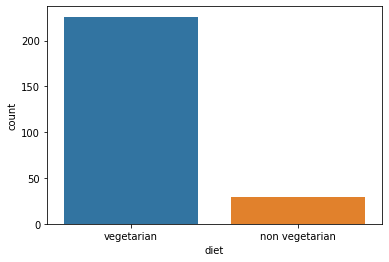

In [17]:
sns.countplot(df['diet'])

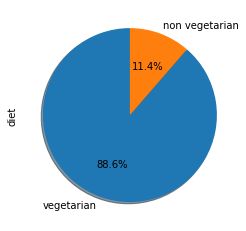

In [18]:
labels = 'vegetarian', 'non vegetarian'
df.diet.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

In the data, vegetarian food is 88.6%. Most of Indian would like to eat vegetarian food.

 for all categorical features

favour profile

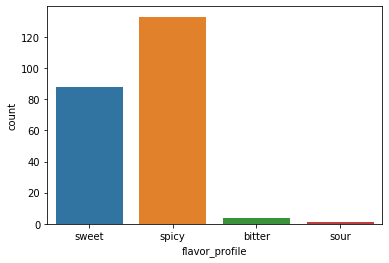

In [19]:
sns.countplot(df['flavor_profile'])

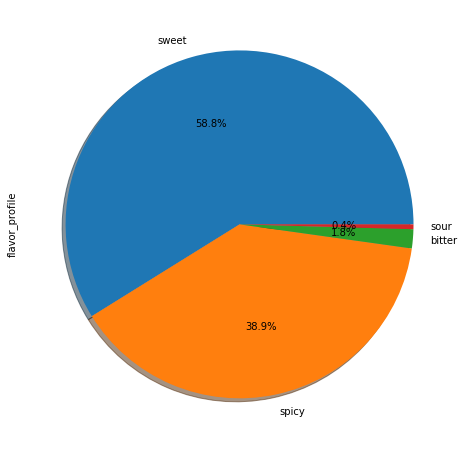

In [20]:
labels = 'sweet', 'spicy', 'bitter', 'sour'
df.flavor_profile.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=360,figsize=(11, 8))

Inference: We see that most dishes in Indian cuisine, i.e, about 59% of them are spicy ; 39% of them are sweet ; 2% of them are bitter while only about 1% of the dishes are sour.

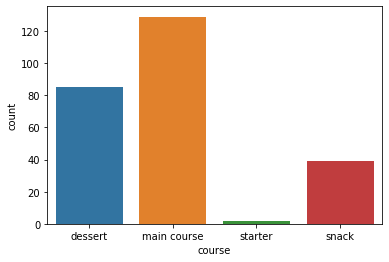

In [21]:
sns.countplot(df['course'])

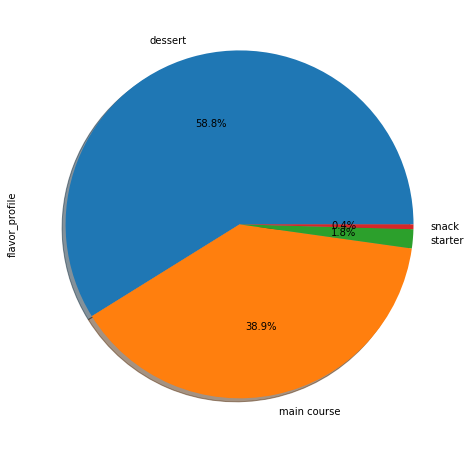

In [22]:
labels = 'dessert', 'main course', 'starter', 'snack'
df.flavor_profile.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=360,figsize=(11, 8))

Inference: We see that most dishes in Indian cuisine, i.e, about 38.9% of them are main course dishes; 58.8% of them are deserts ; 16%% of them are snacks while only about 1% of the dishes are starters.

In [23]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,totaltime
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0


In [24]:
df.diet.unique()

array(['vegetarian', 'non vegetarian'], dtype=object)

In [25]:
df.flavor_profile.unique()

array(['sweet', 'spicy', 'bitter', nan, 'sour'], dtype=object)

In [26]:
df.course.unique()

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

In [27]:
df.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', nan,
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [28]:
df.region.unique()

array(['East', 'West', 'North', nan, 'North East', 'South', 'Central'],
      dtype=object)

diet, flavor_profile, course, state and region are categorical variables

Out of these 9 columns: 2 are numeric features while 5 are categorical features

Analyze the relationship between all categorical features

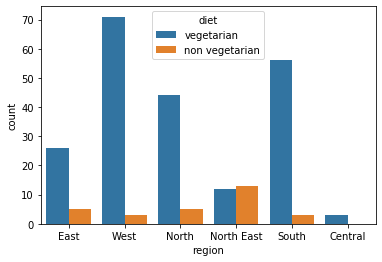

In [29]:
sns.countplot(x='region', hue='diet', data=df)

Inference: We see that :

1)More of vegetarian food is eaten in the western and southern parts of India

2)More of non vegetarian food is eaten in the North East parts of India

3) In the Central region only Vegetarian food is eaten

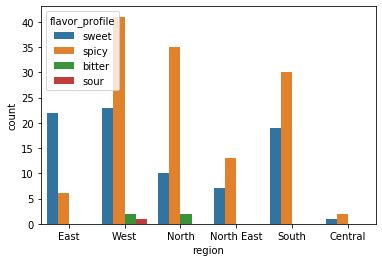

In [30]:
sns.countplot(x='region', hue='flavor_profile', data=df)

Inference:

1)In most of the regions spicy flavour is the most prefered.

2) Most number of spicy and sweet dishes come from the western region.

3)In the Eastern regions sweet flavour is more prefered.

4)Sour dishes are found to come from the western region only.

Analysis for all different states



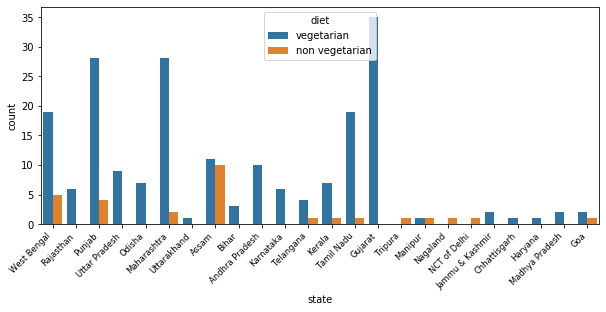

In [31]:
fig, axes = plt.subplots(figsize=(10, 4))
sns.countplot(x='state', hue='diet', data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

Inference:

1) States like Gujrat, Andhra Pradesh ,Karnataka, Uttar Pradesh , Odisha , J&K , Haryana , Chattisgarh,Madhya Pradesh , Rajasthan and Bihar have only vegetarian food .

2) Most number of vegetarian dishes come from Gujrat

3) States like Tripura , Delhi and Nagaland have only non vegetarian food.

4) Most number of non vegetarian dishes come from Assam

5) Others have both non veg and veg food.

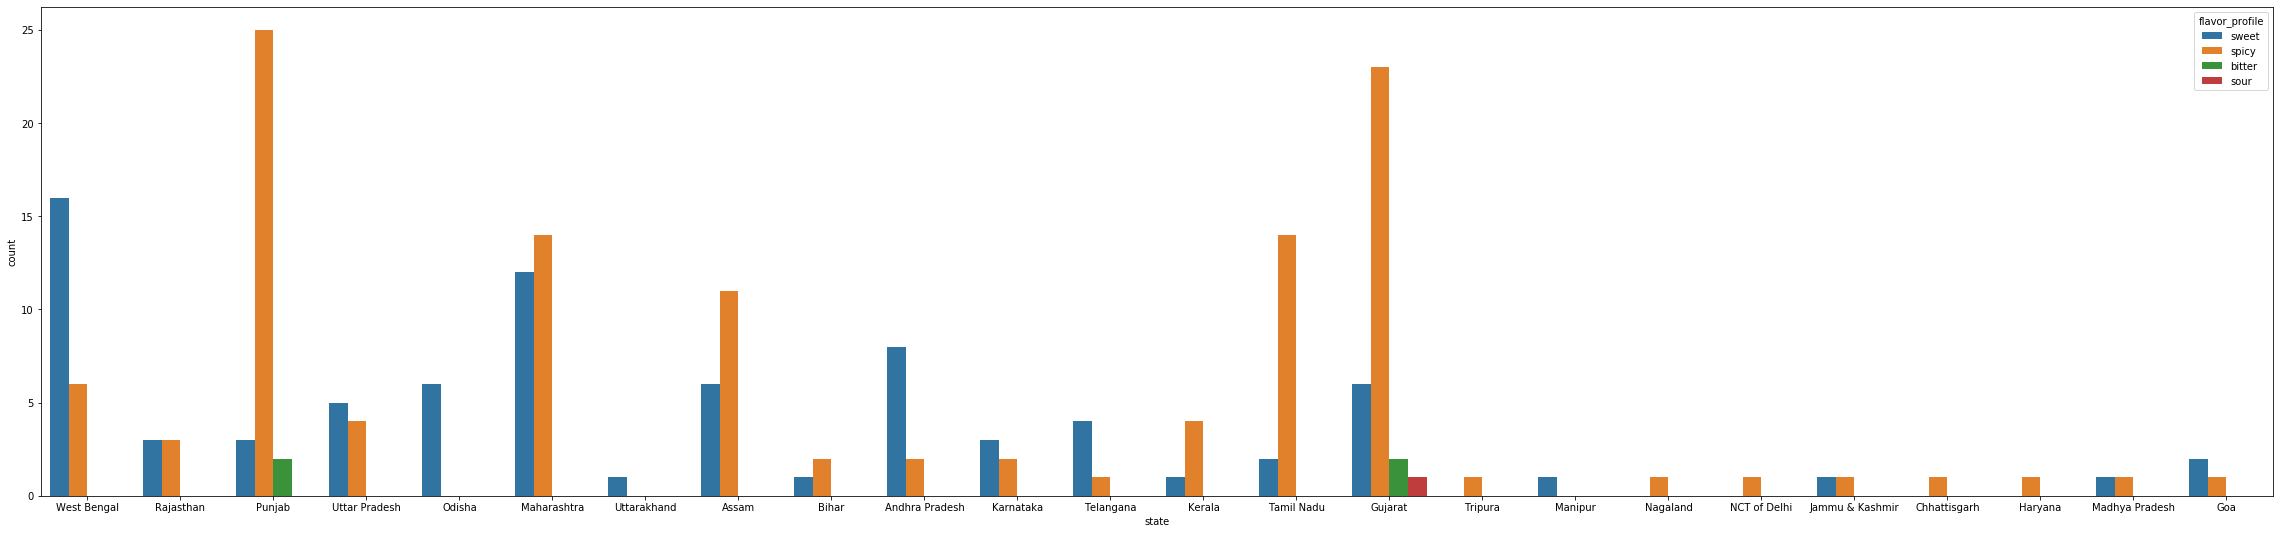

In [32]:
fig, axes = plt.subplots(figsize=(40,9))
sns.countplot(x='state', hue='flavor_profile', data=df)

Inference:

1) Most number of spicy dishes come from Punjab.

2)Most number of sweet dishes come from West Bengal.

3) More number of bitter dishes come from Guajrat

4)Sour dishes are only originating from Guajrat

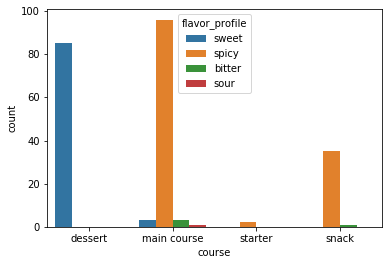

In [33]:
sns.countplot(x='course', hue='flavor_profile', data=df)

Inference:

1)Most of the main course dishes and snacks are spicy

2) The starters consist of only spicy dishes

3) Bitter and sour dishes are found in the maincourse only

In [34]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,totaltime
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0


In [35]:
#no of ingredients used
df['No_of_ingredients']=df.ingredients.apply(lambda x:len(x.split(',')))

In [36]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,totaltime,No_of_ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0,8


In [37]:
df.drop('ingredients',axis=1,inplace=True)

In [38]:
df.head()

,name,diet,prep_time,cook_time,flavor_profile,course,state,region,totaltime,No_of_ingredients
0,Balu shahi,vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0,4
1,Boondi,vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0,3
2,Gajar ka halwa,vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0,6
3,Ghevar,vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0,10
4,Gulab jamun,vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0,8


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               255 non-null    object 
 1   diet               255 non-null    object 
 2   prep_time          255 non-null    float64
 3   cook_time          255 non-null    float64
 4   flavor_profile     226 non-null    object 
 5   course             255 non-null    object 
 6   state              231 non-null    object 
 7   region             241 non-null    object 
 8   totaltime          255 non-null    float64
 9   No_of_ingredients  255 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 20.0+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [48]:

df['diet']=labelencoder.fit_transform(df['diet'].astype(str))
df['flavor_profile']=labelencoder.fit_transform(df['flavor_profile'].astype(str))
df['course']=labelencoder.fit_transform(df['course'].astype(str))
df['state']=labelencoder.fit_transform(df['state'].astype(str))
df['region']=labelencoder.fit_transform(df['region'].astype(str))


In [49]:
df.head()

,name,diet,prep_time,cook_time,flavor_profile,course,state,region,totaltime,No_of_ingredients
0,Balu shahi,1,45.0,25.0,4,0,23,1,70.0,4
1,Boondi,1,80.0,30.0,4,0,17,5,110.0,3
2,Gajar ka halwa,1,15.0,60.0,4,0,16,2,75.0,6
3,Ghevar,1,15.0,30.0,4,0,17,5,45.0,10
4,Gulab jamun,1,15.0,40.0,4,0,23,1,55.0,8


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               255 non-null    object 
 1   diet               255 non-null    int64  
 2   prep_time          255 non-null    float64
 3   cook_time          255 non-null    float64
 4   flavor_profile     255 non-null    int64  
 5   course             255 non-null    int64  
 6   state              255 non-null    int64  
 7   region             255 non-null    int64  
 8   totaltime          255 non-null    float64
 9   No_of_ingredients  255 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 20.0+ KB


After having done the EDA we come to know the the distribution of various dishes through out the various states of the country and regions, as well as the total time taken to prepare it, the ingredients used in making them and their flavour profiles. Using this we can then build a model for an Indian food recommendation system at any restaurants or food delivery applications using the features total time, number of ingredients used, flavour profile and type of diet as primary determinants or filters.